In [2]:
import re
import time
import sqlite3
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
# Get the webpage 
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-extensions")
browser = webdriver.Chrome(executable_path=ChromeDriverManager().install(), chrome_options=chrome_options)
browser.get("https://www.tripadvisor.com/AttractionProductReview-g60745-d11450485-Boston_Hop_On_Hop_Off_Trolley_Tour_with_14_Stops-Boston_Massachusetts.html")
ULR_pattern_str = "https://www.tripadvisor.com/AttractionProductReview-g60745-d11450485-Boston_Hop_On_Hop_Off_Trolley_Tour_with_14_Stops-Boston_Massachusetts.html"
page_URL= ULR_pattern_str.replace("$NUM", str(1))
browser.get(ULR_pattern_str)
page_content = browser.page_source
#Parsing the first page to calculate the maximal number of review pages
num_of_pages = 0;
g = re.compile(r"KxBGd\">(\d,\d*?) reviews",re.S|re.I).findall(page_content)  
if (len(g) > 0):
    total_num_reviews = g[0].strip().replace(',', '')
    print("Total Number of Reviews: " + str(total_num_reviews))
    num_of_pages = int(total_num_reviews) // 10 + 1
    #prepare the database for storing results:
conn = sqlite3.connect('group.db')
c = conn.cursor()
c.execute('''DROP TABLE Tripadvisorreviewstable ''')
c.execute("CREATE TABLE Tripadvisorreviewstable(\
            name varchar(100), \
            rating varchar(100),\
            contribution varchar(50),\
            userLocation varchar(50),\
            reviewMessage text(1000),\
            month varchar(50), \
            year varchar(50))") 
#All listed product information
n = 10
for i in range (num_of_pages):
    all_chunks=re.compile(r'reviewCard(.*?)biGQs _P pZUbB mowmC',re.S|re.I).findall(page_content) 
    if len(all_chunks)>0:
        for chunk in all_chunks:
            #print(chunk)
            #Initialization
            name=""
            rating=""
            contribution=""
            user_location=""
            month=""
            year=""
        
            #Parsing name
            matches=re.compile(r'<a target="_self" href=".*?" class="BMQDV _F G- wSSLS SwZTJ FGwzt ukgoS">(.*?)<\/a><\/span>',re.S|re.I).findall(chunk)
            if(len(matches)>0):
                name=matches[0]
                
            #Parsing rating
            matches=re.compile(r'(\d.0) of 5 bubbles',re.S|re.I).findall(chunk)
            if(len(matches)>0):
                rating=matches[0].strip()
                
            #parsing user location
            matches=re.compile(r'osNWb\"><span>(.*?)<\/span>',re.S|re.I).findall(chunk)
            if(len(matches)>0):
                user_location=matches[0].strip()
            
            #parsing the contribution
            matches=re.compile(r'<span class=\"\">(.*?) contribution',re.S|re.I).findall(chunk)
            if (len(matches)==0): 
                matches=re.compile(r'\"IugUm\">(.*?) contribution',re.S|re.I).findall(chunk)
            contribution=matches[0].strip()
            
            #parsing the month and year
            matches=re.compile(r'RpeCd\">(.*?) (\d{4})',re.S|re.I).findall(chunk)
            if(len(matches) == 1):
                month = matches[0][0].strip()
                year = matches[0][1].strip()
        
            
            #parsing the message 
            matches=re.compile(r'<span class="yCeTE">(.*?)<\/span>',re.S|re.I).findall(chunk)
            if(len(matches)>0):
                review_message=matches[0].strip()
            
            #printing collected data to screen
            print(name+":"+rating+":"+contribution+":"+user_location+":"+review_message+":"+month+":"+year)
             #Save the extracted data into the database
            query = "INSERT INTO Tripadvisorreviewstable VALUES (? ,? , ?, ?, ?, ?, ?)"
            c.execute(query, (name, rating, contribution, user_location, review_message, month, year))
 
    #Is there a next page?
    URL_pattern_str = "https://www.tripadvisor.com/AttractionProductReview-g60745-d11450485-or"+str(n)+"-Boston_Hop_On_Hop_Off_Trolley_Tour_with_14_Stops-Boston_Massachusetts.html"
    page_URL = URL_pattern_str
    print("Collecting data from" + page_URL)
    time.sleep(2)
    browser.get(page_URL)
    page_content=browser.page_source

    n = n + 10


conn.commit()
conn.close()

browser.close()
print("\n\nCollection Finished!")  

/var/folders/dh/_48wjxnn1d72l2_nzxvywhp40000gn/T/ipykernel_37727/1306658186.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path=ChromeDriverManager().install(), chrome_options=chrome_options)
/var/folders/dh/_48wjxnn1d72l2_nzxvywhp40000gn/T/ipykernel_37727/1306658186.py:12: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path=ChromeDriverManager().install(), chrome_options=chrome_options)


Total Number of Reviews: 1187
JoeB70:5.0:86:Lafayette, LA:Fun &amp; comfortable:Dec:2022
Cindy C:5.0:36:Cedar Grove, NJ:Great way to see Boston::
Barbara H:4.0:1::Boston:Nov:2022
LouiseB:5.0:31:Dublin, Ireland:Local knowledge and fun experience:Dec:2022
Ruth Rivard:5.0:2::Old town trolly bus trip::
Ola C:4.0:1::Big city orientation::
Laura L:5.0:4:Pensacola, FL:Would Ride again!:Aug:2022
Colin B:5.0:10:Blackpool:Great Value for money:Oct:2022
Vera Florez:5.0:3:North Miami Beach, FL:Great idea::
Roy M:5.0:2::Great:Nov:2022
Gabby W:5.0:4:Rocca di Papa, Italy:Great way to see and learn about Boston:Nov:2022
Leah M:4.0:1::Great way to see the city!:Nov:2022
KamsMomJ13:5.0:1:Irmo, SC:Fabulous Fun and Informative:Nov:2022
dorit d:5.0:1::Great Drivers, Great Tour:Nov:2022
Dougiepc:4.0:715:Chipping Ongar, UK:Pretty good:Nov:2022
SnyderDuane:4.0:23:Denver, CO:Great way to see the city:Oct:2022
Rick M:5.0:2::Excellent:Nov:2022
nf25h:5.0:1::Superb day in Boston!::
Barry B:2.0:170:Ottawa, Canada:v

Anya:2.0:1::Didn’t learn much:Oct:2022
U_s_a_Viajera2008:1.0:145:U.S.A.:Horrible experience:Sep:2022
Deb and Del:5.0:7:Parker, CO:Fascinating tour!!!:Sep:2022
Experience770924:4.0:14:Dallas, TX:Great way to see Boston with live commentary by the driver.::
Radhika S:1.0:1::Long lines, expensive, not worth it::
Arthur E:2.0:1::Disappointed::
PinkShoeAddict:3.0:98:Darien, IL:Very crowded on weekends::
tmh2209:5.0:25:Santee, CA:Great toyr:Sep:2022
Lorraine M:3.0:31:Redland Bay, Australia:Great concept but oversold.::
Carole T:1.0:32:San Antonio, Texas, United States:Not worth it:Sep:2022
Phil D:2.0:9:Hendersonville, NC:Way over priced!::
FellowTraveler238799:5.0:1:Park City, UT:Ask for Crafty!:Sep:2022
Bernice W:5.0:1:Philadelphia, PA:Philly in Boston:Sep:2022
jess:5.0:2:El Dorado Hills, CA:Well worth the time and money::
lpeckenpaugh:5.0:66:Germantown, WI:Hop on/off Boston::
Tony S:2.0:2:Stourbridge, UK:Very poor:Sep:2022
Beverley L:5.0:1::Boston Tour:Sep:2022
Amy A:4.0:9:Denver, CO:Defin

Karen K:5.0:5:Los Angeles, CA:Duck Duck Duck Duck, Quack:Aug:2022
KimAnn77:5.0:66:Tennessee:Stress free way to get around the city::
free green:5.0:3:North Attleboro, Massachusetts:Fun, easy, relaxing way to see a chunk of the city:Aug:2022
Tim R:5.0:39:Rochester, NY:See the sights in 2 hours:Aug:2022
Susan R:5.0:11::Worth It:Aug:2022
tnshsms:4.0:82:Missouri:Great option:Aug:2022
Johngelliott:2.0:32:Belfast, UK:Brit bashing at its best::
brittp239:5.0:5:Naples, FL:Great was to see a lot of the city::
Candice B:5.0:1::Lisbon was a rock star tour guide!:Aug:2022
DantehetGooi:2.0:93:Amsterdam, The Netherlands:Rip off!::
Karen B:5.0:4:Chelmsford, UK:Great way to see the city:Aug:2022
The Beckster:5.0:57:Largo, FL:Had a great experience.::
Tim B:5.0:1::Wylie - best driver ever!::
cathyvaldes:3.0:41:Starkville, MS:Meh!::
P Mc:2.0:23::Long waits:Aug:2022
Dawn P:5.0:5::Hot day/Drivers are great!::
Boat L:2.0:53:Hilton Head, SC:Maybe okay for a full lap to get the lay of the land.  Then walk.:J

Bob C:5.0:70:Fenton, MO:A Fun and Convenient Way to See Boston::
Traci H:3.0:32:Waddell, AZ:Long lines on weekends and drivers mixed reviews::
Manuela F:5.0:1::Absolutely amazing!!::
Sarah F:5.0:2::Perfect for a comprehensive overview of Boston::
CharliePasta:5.0:3:Pensacola, FL:Well worth it!::
Grandmar232:5.0:2:Tucson, AZ:On and off bus tour:Jun:2022
KarenFunTrips:5.0:66:Burlington, MA:Fun Boston Tour:Jun:2022
Mark T:5.0:1::Great fun and informative:Jun:2022
Janisee:5.0:3:Saint Louis, MO:Worth the price::
Tommy P:4.0:272:Hazel Green, AL:Great way to spend the day::
Andi Jones:5.0:3:Stayton, OR:The Best Way:Jun:2022
168dannas:5.0:5::Fun and easy way to “quick see” Boston and then go deeper where your interest lies.:Jun:2022
Passport419773:5.0:4::Great Trolley tour:Jun:2022
Meghan H:5.0:4:East Lansing, MI:Boston in a day:Jun:2022
Mags363:5.0:3:Somers Point, NJ:Great way to see Boston!::
Summar L:4.0:18::Enjoyable and informative learning experience, beware of other talkative passengers

Lacy C:5.0:1:Boston, MA:Murph was great!::
Jose3349:4.0:6:Miami, FL:Could run for longer hrs,::
Sam S:5.0:1::Great Boston hop on hop off tour.:Jan:2022
martyn:5.0:2::The best way to see Boston!!!::
Nisreen F:5.0:2::Great Time:Dec:2021
mrdanusa:5.0:3:Paris, France:Informative and Entertaining with Crafty::
Momleit:5.0:14:New Jersey:Boston weekend:Dec:2021
Barbara C:5.0:16:Harrisburg, PA:Wow, Boston's Trolleys are Superbowl Champ  quality too!:Dec:2021
Emily H:3.0:1::Good, not great:Dec:2021
4graceboys:3.0:2:Westlake Village, CA:Meh:Nov:2021
Josh T:5.0:117:Athens, PA:Worth the Money!!:Nov:2021
Josephine L:5.0:1::Great tour and workers:Nov:2021
Sam:5.0:14::Magoo is the man!:Nov:2021
TripleWhit:5.0:22:Paris, IL:Best way to sightsee in Boston::
Tracy Cloud:5.0:14:Sneads, FL:Captain Matty was great!:Nov:2021
Precious M:5.0:1::Trolley Review:Nov:2021
Ana L:5.0:2::Super fun historical tour:Nov:2021
christybb:4.0:18:Waynesville, NC:Ride with Mcgoo!! He was the best.::
Momuv4boys:5.0:60:Texas:Do

Jennifer M:5.0:2::Wonderful tour!:Sep:2021
Kim W:5.0:6:Louisville, KY:Joe was awesome:Sep:2021
Simara:5.0:2:Altamonte Springs, FL:Awesome tour!:Sep:2021
Emily M:5.0:9:Whitmore Lake, MI:Fun way to see the sights in Boston:Aug:2021
lagunanina:5.0:50:Laguna Niguel, CA:Wonderful and entertaining trolley driver—ask for Magoo!:Sep:2021
Day:5.0:13:Puerto Rico:excellent driver:Sep:2021
Lmcvay3:5.0:10::Review:Sep:2021
Scenic520684:5.0:37:Kansas:Great Tour - Highly Recommend!!:Aug:2021
Adrian C:5.0:2:Las Vegas, NV:Drivers are the best!:Sep:2021
JillyBean518:5.0:5::Well worth the price of admission::
cat5bird:5.0:17:Lawrence, KS:Informative &amp; fun!::
Dc Native:2.0:25:Fairfax, VA:Not enough history to the narration:Sep:2021
J W:3.0:35::An OK tour of Boston:Jul:2021
Stephanie D:4.0:62::Best tour guide.....Mr Magoo!::
Andrew O:5.0:1::HERCULES:Aug:2021
Tyler B:5.0:1::Absolutely amazing:Aug:2021
Carly J:5.0:1::A True Bargain .....:Aug:2021
Kristie M:5.0:4::Great experience:Aug:2021
Kaia P:4.0:2::Mr

lcangel1:5.0:38:Pottsville, AR:Great way to get a feel for the city.:May:2021
Rafy S:5.0:1::Best trip:May:2021
maryk12162019:1.0:5:Malakoff, TX:No Seats to Reboard:May:2021
FarAway307689:5.0:1::An excellent good time!:Apr:2021
John M:5.0:3::Hidden gem on the trolley tour:May:2021
larryrneal2016:2.0:474:Warren, PA:No HOP ON-HOP OFF, just a ride around.:Apr:2021
Wendy S:4.0:15:Austin, TX:Too expensive for what you get during COVID guidelines.:Apr:2021
EvelynHamilton_NJ:4.0:76:Hamilton, NJ:Great Boston Overview:Apr:2021
Helen V:1.0:1::Disappointed:Apr:2021
The Hilts's:4.0:2::Fun and interactive:Mar:2021
T. Ski:3.0:46:Marlton, NJ:OK but not great (as tours in other cities).::
James P:5.0:1::Old Time Trolley of Boston:Feb:2021
Nathely S:5.0:2:Birmingham, AL:Great time to see Boston:Feb:2021
Rachel A:5.0:1::Great tour and way to see Boston!:Nov:2020
Alyssa Ann:5.0:12:Washington DC, DC:GREAT EXPERIENCE:Jan:2020
Kristina G:5.0:1::Fun way to see beautiful city!:Dec:2020
Abhishek D:5.0:2::Wholes

Voyage828795:5.0:7::GREAT HISTORY LESSON FOR A GOOD PRICE:Nov:2019
Vincent D:3.0:1,219:Dún Laoghaire, Ireland:Too expensive and not informative enough.:Nov:2019
pennych:5.0:421:Worthing, UK:Well worth taking the tour::
Tourist777960:5.0:7::"Sweet Caroline"  One day Hop-on Hop-Off with Taylor!:Oct:2019
jananew1:5.0:14::Great way to explore the city:Nov:2019
Gill AEuxton:5.0:16:Chorley, UK:Informative and fun trip:Sep:2019
PaigeCP:4.0:15:Jacksonville, FL:Good way to get familar with Boston:Nov:2019
CHIRT143:5.0:24:MINNESOTA:Good tour of Boston:Oct:2019
Mandy C:5.0:24:Richmond, VA:Thank goodness the trolley was enclosed and heated:Nov:2019
lgreene71:5.0:8:San Jose, CA:Great hop on hop off tour::
North-Jersey-2016:5.0:14:Vernon, NJ:Cruise Stop:Oct:2019
Pattie452:5.0:105:Pass Christian, MS:Great Way to See Boston:Sep:2019
Joyce T:5.0:46:Springfield, VA:Good understandable tour!:Nov:2019
Nomad5522:5.0:2,337:Clacton-on-Sea, UK:Excellent tour::
MercyBuckets78:5.0:5::Great value:Oct:2019
donnab

GoTraveler:1.0:95:Washington DC, DC:Cruise Rip Off::
Cliff D:5.0:2:Beavercreek, OH:Informative and fun, but don't be in a hurry:Sep:2019
BabyBoomer64traveler:2.0:26:Chicago, IL:Waiting time not worth trip:Oct:2019
pisc0011:3.0:430:Ironwood, MI:Way longer wait times than expected::
Hiru B:1.0:106:London, UK:Absolute rubbish!::
cathy a:5.0:9::Fun and easy way to see the city:Sep:2019
michellemtravelfan:5.0:26:Atlanta, GA:Boston Trolley Tour:Sep:2019
Vicki S:5.0:12:Oostburg, WI:Old Town Trolley:Sep:2019
mariabarnes:4.0:991:Northampton, UK:Good way of seeing the city::
Angela B:4.0:4::Excellent way to learn about Boston:Sep:2019
SamaraInfoCenter:5.0:1,542:Playa Samara, Costa Rica:Excellent tour:Sep:2019
Linda:3.0:2:Dayton, OH:Long wait for bus:Sep:2019
Barb H:5.0:135:St. Augustine, FL:Enjoyable::
Megan P:5.0:11::Mrs. Beantown was Great!:Sep:2019
Cathy F:5.0:34:Concord, NC:Maureen is a fun guid.  Tour is a good value and very good:Sep:2019
Riggers1938:5.0:17::Boston Tea Party:Sep:2019
Phyll

tomcgibbs42:4.0:20:Shelby Township, MI:Easy and fast:Jul:2019
frank m:5.0:1::Great time in Boston:Jul:2019
Janmd4:5.0:55:Maryland:Boston port:Jun:2019
Anna P:5.0:3::Hop on hop off:Jul:2019
NewPlaceFan:4.0:374:Kenosha, WI:Convenient way to see the various sites and get around:Jul:2019
jcheing:5.0:82:Coconut Creek, FL:It summarized the most important spots on the area:Jul:2019
Sonya:5.0:1::Great way to see the city:Jul:2019
Deborah K:3.0:28:Watertown, WI:Convenient but expect to wait.:Jul:2019
The Standishes:5.0:4:Palm Desert, CA:John &amp; Marilyn Standish:Jul:2019
Katie S:4.0:45:Carmel, Indiana, United States:Busy day in Boston:Jul:2019
Cheryl P:5.0:2::Boston Tour:Jul:2019
charlotte04050:2.0:33:Sarasota, FL:None:Jul:2019
juleli:5.0:53:Croydon, UK:Best thing to do on your first day:May:2019
Charanderle:2.0:2::Disappointing:Jul:2019
Danceandbutch2:5.0:61:Chicago, IL:Nice informative bus tour:Jul:2019
Jay:5.0:9:Byron, GA:Cheaper than Uber:Jul:2019
Inspire665697:4.0:4::Boston Hop On Hop Of

Denise K:5.0:45:Adelaide, Australia:Bus and Harbour Cruise - a Great experience:Sep:2018
foodie2401:4.0:16::Convenient and informative::
Paul H:5.0:72:Winnipeg, Canada:Easy Visit:Sep:2018
Sanndy100:2.0:69:Lexington, KY:Worst Hop-on Hop-off I've Ever Used:Aug:2018
Karen H:4.0:18:Jonesboro, Georgia, United States:Great way to see Boston without fighting the traffic:Sep:2018
Natalia V:5.0:43:Elmhurst, NY:Family weekend visit:Sep:2018
Gary D:2.0:29:Temple, TX:disappointed:Aug:2018
Sue R:5.0:23:Pakenham, Australia:A great day::
Tt T:5.0:12:New York:day trip shopping:Sep:2018
Angelo M:5.0:169:Lombardy, Italy:Great!:Aug:2018
Liltexann:5.0:8:Henderson, NV:Great way to see Boston in a short amount of time!:Jul:2018
kimhines:5.0:53:Wake Forest, NC:Best way to see the city!:Aug:2018
barbara d:4.0:50:Hamilton Ontario:Enjoyable way to see the city!:Aug:2018
IANPOL:4.0:13:Glasgow, UK:EASY WAY TO SEE THE CITY IN A SHORT TIME:May:2018
jjm1000:4.0:84:Cork:Interesting and useful:Aug:2018
Paula B:5.0:7:O

In [3]:
import sqlite3

conn = sqlite3.connect('group.db')
c = conn.cursor()

c.execute("SELECT * FROM Tripadvisorreviewstable ")
result = c.fetchall()

print(result)

c.close()
conn.close()

[('JoeB70', '5.0', '86', 'Lafayette, LA', 'Fun &amp; comfortable', 'Dec', '2022'), ('Cindy C', '5.0', '36', 'Cedar Grove, NJ', 'Great way to see Boston', '', ''), ('Barbara H', '4.0', '1', '', 'Boston', 'Nov', '2022'), ('LouiseB', '5.0', '31', 'Dublin, Ireland', 'Local knowledge and fun experience', 'Dec', '2022'), ('Ruth Rivard', '5.0', '2', '', 'Old town trolly bus trip', '', ''), ('Ola C', '4.0', '1', '', 'Big city orientation', '', ''), ('Laura L', '5.0', '4', 'Pensacola, FL', 'Would Ride again!', 'Aug', '2022'), ('Colin B', '5.0', '10', 'Blackpool', 'Great Value for money', 'Oct', '2022'), ('Vera Florez', '5.0', '3', 'North Miami Beach, FL', 'Great idea', '', ''), ('Roy M', '5.0', '2', '', 'Great', 'Nov', '2022'), ('Gabby W', '5.0', '4', 'Rocca di Papa, Italy', 'Great way to see and learn about Boston', 'Nov', '2022'), ('Leah M', '4.0', '1', '', 'Great way to see the city!', 'Nov', '2022'), ('KamsMomJ13', '5.0', '1', 'Irmo, SC', 'Fabulous Fun and Informative', 'Nov', '2022'), ('do

In [4]:
import sqlite3
conn = sqlite3.connect("group.db")
cursor = conn.cursor()
cursor.execute ("SELECT * from Tripadvisorreviewstable ")
rows =cursor.fetchall()
header = ""
for column_info in cursor.description:
    header += column_info[0] + ","
print(header)
for row in rows:
    print(row) 
conn.commit()
cursor.close()
conn.close ()

name,rating,contribution,userLocation,reviewMessage,month,year,
('JoeB70', '5.0', '86', 'Lafayette, LA', 'Fun &amp; comfortable', 'Dec', '2022')
('Cindy C', '5.0', '36', 'Cedar Grove, NJ', 'Great way to see Boston', '', '')
('Barbara H', '4.0', '1', '', 'Boston', 'Nov', '2022')
('LouiseB', '5.0', '31', 'Dublin, Ireland', 'Local knowledge and fun experience', 'Dec', '2022')
('Ruth Rivard', '5.0', '2', '', 'Old town trolly bus trip', '', '')
('Ola C', '4.0', '1', '', 'Big city orientation', '', '')
('Laura L', '5.0', '4', 'Pensacola, FL', 'Would Ride again!', 'Aug', '2022')
('Colin B', '5.0', '10', 'Blackpool', 'Great Value for money', 'Oct', '2022')
('Vera Florez', '5.0', '3', 'North Miami Beach, FL', 'Great idea', '', '')
('Roy M', '5.0', '2', '', 'Great', 'Nov', '2022')
('Gabby W', '5.0', '4', 'Rocca di Papa, Italy', 'Great way to see and learn about Boston', 'Nov', '2022')
('Leah M', '4.0', '1', '', 'Great way to see the city!', 'Nov', '2022')
('KamsMomJ13', '5.0', '1', 'Irmo, SC', '

In [5]:
import pandas as pd
df = pd.DataFrame(rows, columns = ['Name','rating', 'Contribution', 'userLocation', 'reviewMessage', 'month','year'])
print(df)

                 Name rating Contribution     userLocation  \
0              JoeB70    5.0           86    Lafayette, LA   
1             Cindy C    5.0           36  Cedar Grove, NJ   
2           Barbara H    4.0            1                    
3             LouiseB    5.0           31  Dublin, Ireland   
4         Ruth Rivard    5.0            2                    
...               ...    ...          ...              ...   
1165      DonaldYokum    5.0          742      Ventura, CA   
1166          Josie T    3.0           32                    
1167       Brettkort1    5.0          617     Appleton, WI   
1168         xocy0135    5.0           10      Atlanta, GA   
1169  stlbluesfan2017    4.0           38    Maryville, IL   

                           reviewMessage month  year  
0                  Fun &amp; comfortable   Dec  2022  
1                Great way to see Boston              
2                                 Boston   Nov  2022  
3     Local knowledge and fun exper

In [6]:
import numpy as np
#def recode_empty_cells(df,['userLocation','month','year']):
for column in ['userLocation','month','year']:
    df[column] = df[column].replace(r'^\s*$', np.nan, regex=True)
    df[column] = df[column].fillna(0)
    
print(df)

                 Name rating Contribution     userLocation  \
0              JoeB70    5.0           86    Lafayette, LA   
1             Cindy C    5.0           36  Cedar Grove, NJ   
2           Barbara H    4.0            1                0   
3             LouiseB    5.0           31  Dublin, Ireland   
4         Ruth Rivard    5.0            2                0   
...               ...    ...          ...              ...   
1165      DonaldYokum    5.0          742      Ventura, CA   
1166          Josie T    3.0           32                0   
1167       Brettkort1    5.0          617     Appleton, WI   
1168         xocy0135    5.0           10      Atlanta, GA   
1169  stlbluesfan2017    4.0           38    Maryville, IL   

                           reviewMessage month  year  
0                  Fun &amp; comfortable   Dec  2022  
1                Great way to see Boston     0     0  
2                                 Boston   Nov  2022  
3     Local knowledge and fun exper

In [7]:
df.to_csv("tripadvisortable.csv") 
Tripadvisor_boston =pd.read_csv('tripadvisortable.csv')
Tripadvisor_boston

,Unnamed: 0,Name,rating,Contribution,userLocation,reviewMessage,month,year
0,0,JoeB70,5.0,86,"Lafayette, LA",Fun &amp; comfortable,Dec,2022
1,1,Cindy C,5.0,36,"Cedar Grove, NJ",Great way to see Boston,0,0
2,2,Barbara H,4.0,1,0,Boston,Nov,2022
3,3,LouiseB,5.0,31,"Dublin, Ireland",Local knowledge and fun experience,Dec,2022
4,4,Ruth Rivard,5.0,2,0,Old town trolly bus trip,0,0
...,...,...,...,...,...,...,...,...
1165,1165,DonaldYokum,5.0,742,"Ventura, CA",Good coverage of Boston,Apr,2018
1166,1166,Josie T,3.0,32,0,Depends on driver,May,2018
1167,1167,Brettkort1,5.0,617,"Appleton, WI",Great Tour of Boston!,Apr,2018
1168,1168,xocy0135,5.0,10,"Atlanta, GA",Good Transportation and Fun,Nov,2017


In [8]:
Tripadvisor_boston.describe(include='all')

,Unnamed: 0,Name,rating,Contribution,userLocation,reviewMessage,month,year
count,1170.000000,1169,1170.000000,1170,1170,1170,1170,1170.000000
unique,NaN,1133,NaN,207,589,1021,13,NaN
top,NaN,John M,NaN,1,0,Great tour,0,NaN
freq,NaN,3,NaN,239,449,11,323,NaN
mean,584.500000,NaN,4.274359,NaN,NaN,NaN,NaN,1462.652991
std,337.894214,NaN,1.167323,NaN,NaN,NaN,NaN,903.622267
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,292.250000,NaN,4.000000,NaN,NaN,NaN,NaN,0.000000
50%,584.500000,NaN,5.000000,NaN,NaN,NaN,NaN,2019.000000
75%,876.750000,NaN,5.000000,NaN,NaN,NaN,NaN,2021.000000


In [9]:
Tripadvisor_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1170 non-null   int64  
 1   Name           1169 non-null   object 
 2   rating         1170 non-null   float64
 3   Contribution   1170 non-null   object 
 4   userLocation   1170 non-null   object 
 5   reviewMessage  1170 non-null   object 
 6   month          1170 non-null   object 
 7   year           1170 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 73.2+ KB


In [10]:
Tripadvisor_boston.shape
#1171 observations and 8 characteristics

(1170, 8)

In [11]:
Tripadvisor_boston['Name'].value_counts()

John M             3
Jennifer M         3
Linda K            3
Linda B            3
Mark T             3
                  ..
Linda F            1
600md              1
Gail K             1
Catherine M        1
stlbluesfan2017    1
Name: Name, Length: 1133, dtype: int64

In [12]:
Tripadvisor_boston['rating'].value_counts()

5.0    741
4.0    205
3.0     92
2.0     68
1.0     64
Name: rating, dtype: int64

In [13]:
Tripadvisor_boston['Contribution'].value_counts()

1        239
2        125
3         89
4         60
5         32
        ... 
78         1
206        1
1,738      1
142        1
220        1
Name: Contribution, Length: 207, dtype: int64

In [14]:
Tripadvisor_boston['userLocation'].value_counts()

0                    449
Atlanta, GA            9
Chicago, IL            9
Boston, MA             8
New York City, NY      6
                    ... 
Jessup, MD             1
Castle Rock, WA        1
Lowville, NY           1
Fords, NJ              1
Maryville, IL          1
Name: userLocation, Length: 589, dtype: int64

In [15]:
Tripadvisor_boston['reviewMessage'].value_counts()

Great tour                       11
Great way to see Boston          11
Great way to see the city        11
Disappointed                      8
Boston                            7
                                 ..
Fun choice                        1
Great way to see major points     1
Nice visit                        1
Sightseeing with ease!            1
Quick in town visit               1
Name: reviewMessage, Length: 1021, dtype: int64

In [16]:
Tripadvisor_boston['month'].value_counts()

0      323
Oct    182
Sep    157
Aug    125
Jul    116
Jun     75
May     59
Nov     38
Apr     36
Mar     21
Dec     18
Feb     12
Jan      8
Name: month, dtype: int64

In [17]:
Tripadvisor_boston['year'].value_counts()

0       323
2022    292
2019    265
2021    170
2020     60
2018     55
2017      5
Name: year, dtype: int64

In [18]:
Tripadvisor_boston.groupby('Contribution').describe()

Unnamed: 0                                                        \
                  count        mean         std    min     25%    50%     75%   
Contribution                                                                    
1                 239.0  533.384937  295.997875    2.0  296.00  546.0  765.00   
1,002               1.0  977.000000         NaN  977.0  977.00  977.0  977.00   
1,067               1.0  571.000000         NaN  571.0  571.00  571.0  571.00   
1,134               1.0  797.000000         NaN  797.0  797.00  797.0  797.00   
1,145               1.0  893.000000         NaN  893.0  893.00  893.0  893.00   
...                 ...         ...         ...    ...     ...    ...     ...   
96                  3.0  771.666667   29.005747  743.0  757.00  771.0  786.00   
97                  2.0  680.500000  364.159992  423.0  551.75  680.5  809.25   
98                  1.0  116.000000         NaN  116.0  116.00  116.0  116.00   
99                  2.0  952.000000   55.154329  913.0  932.50  952.0  971.50   
991                 1.0  928.000000         NaN  928.0  928.00  928.0  928.00   

                     rating            ...             year               \
                 max  count      mean  ...  75%  max  count         mean   
Contribution                           ...                                 
1             1084.0  239.0  4.251046  ...  5.0  5.0  239.0  1640.301255   
1,002          977.0    1.0  5.000000  ...  5.0  5.0    1.0     0.000000   
1,067          571.0    1.0  5.000000  ...  5.0  5.0    1.0     0.000000   
1,134          797.0    1.0  5.000000  ...  5.0  5.0    1.0     0.000000   
1,145          893.0    1.0  4.000000  ...  4.0  4.0    1.0     0.000000   
...              ...    ...       ...  ...  ...  ...    ...          ...   
96             801.0    3.0  4.333333  ...  5.0  5.0    3.0  1346.333333   
97             938.0    2.0  4.000000  ...  4.5  5.0    2.0  1011.000000   
98             116.0    1.0  3.000000  ...  3.0  3.0    1.0     0.000000   
99             991.0    2.0  5.000000  ...  5.0  5.0    2.0  1009.500000   
991            928.0    1.0  4.000000  ...  4.0  4.0    1.0     0.000000   

                                                                  
                      std  min      25%     50%      75%     max  
Contribution                                                      
1              791.662139  0.0  2019.00  2021.0  2022.00  2022.0  
1,002                 NaN  0.0     0.00     0.0     0.00     0.0  
1,067                 NaN  0.0     0.00     0.0     0.00     0.0  
1,134                 NaN  0.0     0.00     0.0     0.00     0.0  
1,145                 NaN  0.0     0.00     0.0     0.00     0.0  
...                   ...  ...      ...     ...      ...     ...  
96            1165.958976  0.0  1009.50  2019.0  2019.50  2020.0  
97            1429.769912  0.0   505.50  1011.0  1516.50  2022.0  
98                    NaN  0.0     0.00     0.0     0.00     0.0  
99            1427.648591  0.0   504.75  1009.5  1514.25  2019.0  
991                   NaN  0.0     0.00     0.0     0.00     0.0  

[207 rows x 24 columns]

In [19]:
Tripadvisor_boston2 = Tripadvisor_boston.groupby(['userLocation','year'])['userLocation'].count()
Tripadvisor_boston2

userLocation              year
0                         0       90
                          2018     3
                          2019    94
                          2020    34
                          2021    87
                                  ..
karenhill87               0        1
nj                        2020     1
swansea                   0        1
theresa, United States    2021     1
white oak, United States  0        1
Name: userLocation, Length: 682, dtype: int64

In [20]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

<AxesSubplot:xlabel='rating', ylabel='count'>

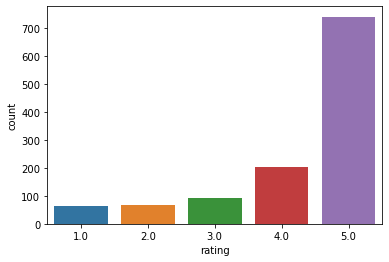

In [22]:
sns.countplot(x='rating',data=Tripadvisor_boston)

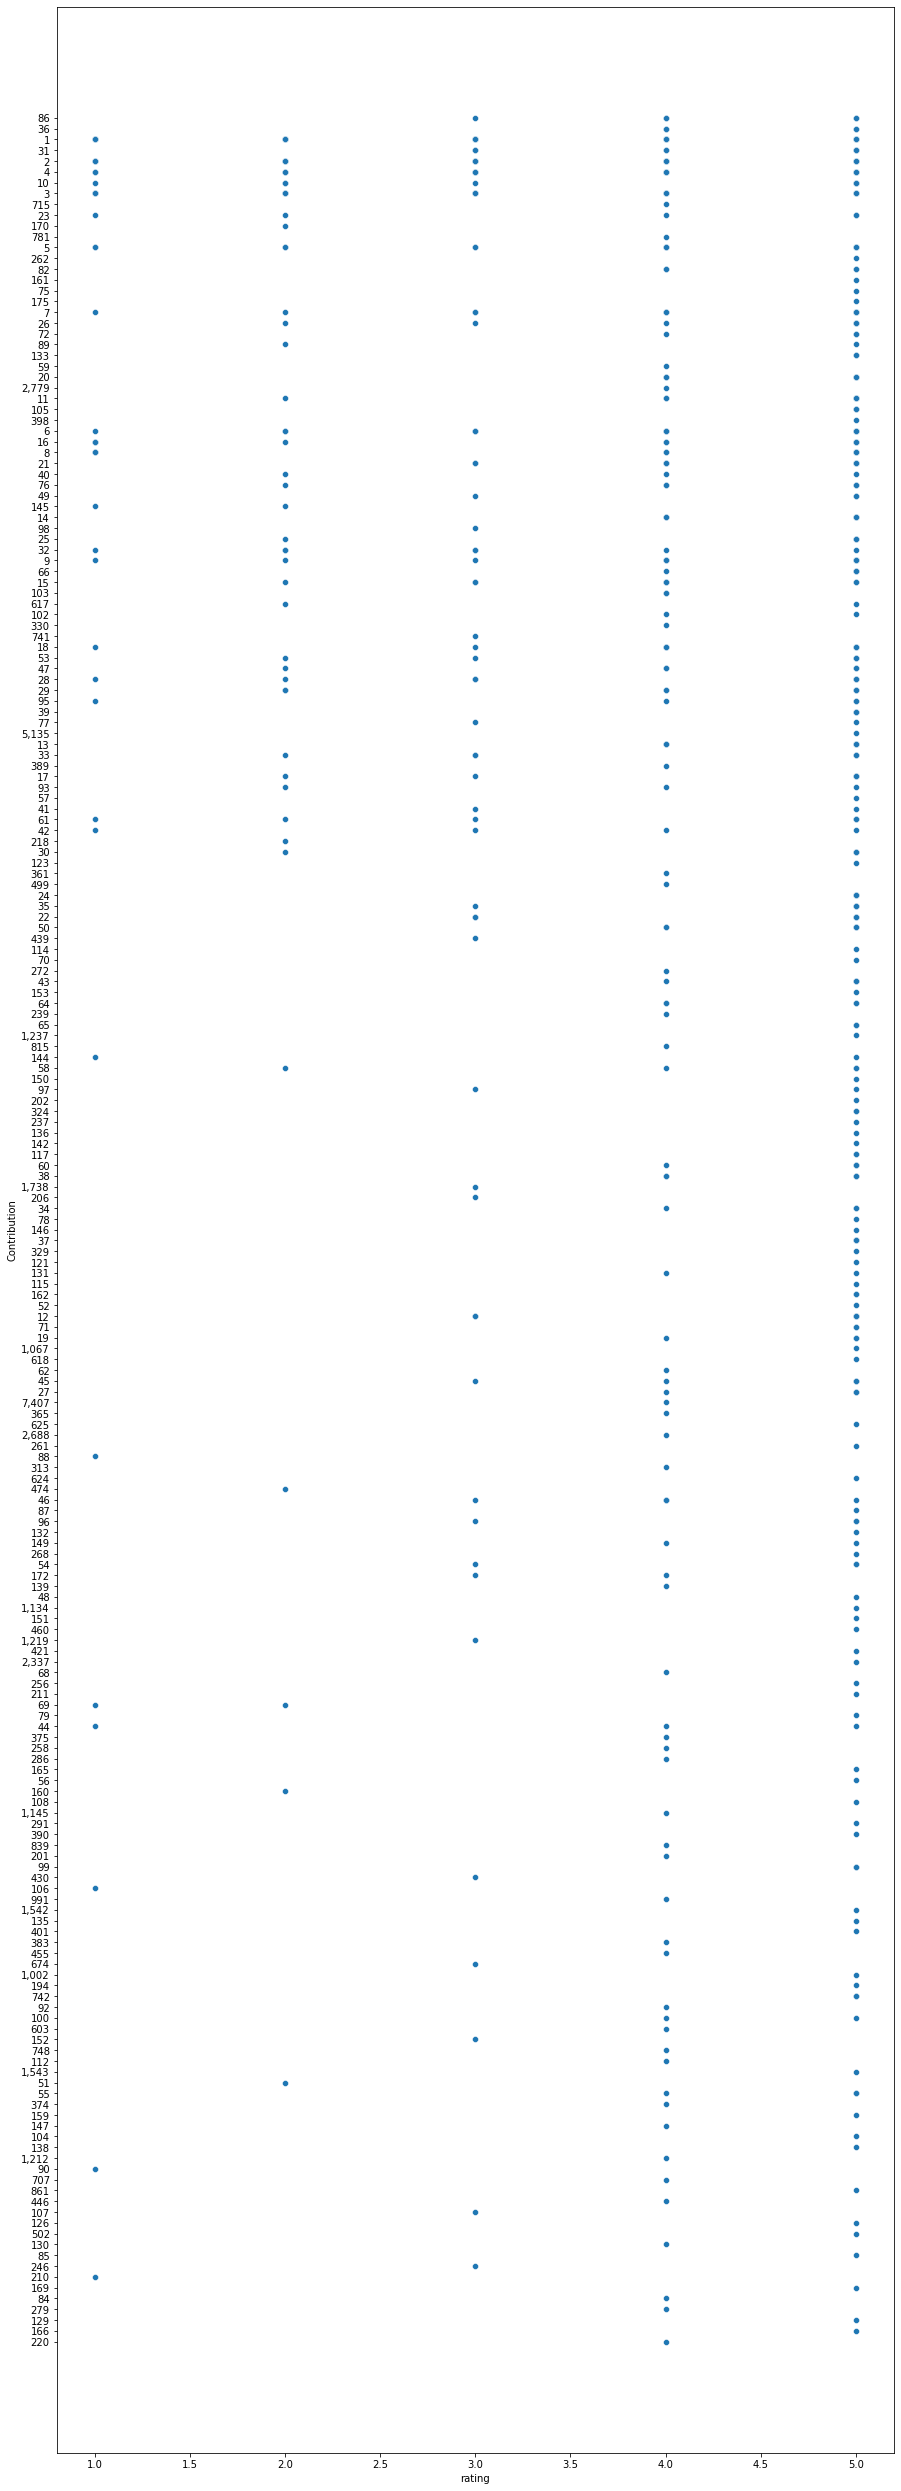

In [23]:
#Visualization
ax = plt.subplots(figsize=(15,45))
sns.scatterplot(x = "rating", y = "Contribution", data=Tripadvisor_boston)
plt.show()

In [24]:
Tripadvisor_boston1 = Tripadvisor_boston['year'] > 0
Tripadvisor_boston1

0        True
1       False
2        True
3        True
4       False
        ...  
1165     True
1166     True
1167     True
1168     True
1169     True
Name: year, Length: 1170, dtype: bool

In [25]:
Tripadvisor_boston7 = Tripadvisor_boston[Tripadvisor_boston1]
Tripadvisor_boston7

,Unnamed: 0,Name,rating,Contribution,userLocation,reviewMessage,month,year
0,0,JoeB70,5.0,86,"Lafayette, LA",Fun &amp; comfortable,Dec,2022
2,2,Barbara H,4.0,1,0,Boston,Nov,2022
3,3,LouiseB,5.0,31,"Dublin, Ireland",Local knowledge and fun experience,Dec,2022
6,6,Laura L,5.0,4,"Pensacola, FL",Would Ride again!,Aug,2022
7,7,Colin B,5.0,10,Blackpool,Great Value for money,Oct,2022
...,...,...,...,...,...,...,...,...
1165,1165,DonaldYokum,5.0,742,"Ventura, CA",Good coverage of Boston,Apr,2018
1166,1166,Josie T,3.0,32,0,Depends on driver,May,2018
1167,1167,Brettkort1,5.0,617,"Appleton, WI",Great Tour of Boston!,Apr,2018
1168,1168,xocy0135,5.0,10,"Atlanta, GA",Good Transportation and Fun,Nov,2017


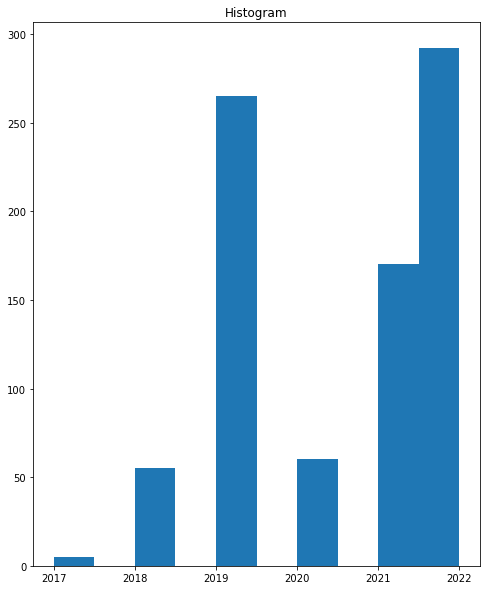

In [26]:
ax = plt.subplots(figsize=(8,10))
plt.hist(Tripadvisor_boston7['year'])
plt.title("Histogram")
plt.show()

In [27]:
Tripadvisor_boston3 = Tripadvisor_boston.groupby(['year','rating'])['reviewMessage'].agg('count').reset_index()
Tripadvisor_boston3

,year,rating,reviewMessage
0,0,1.0,19
1,0,2.0,21
2,0,3.0,28
3,0,4.0,53
4,0,5.0,202
5,2017,4.0,2
6,2017,5.0,3
7,2018,1.0,1
8,2018,2.0,3
9,2018,3.0,7


In [28]:
Tripadvisor_boston4=Tripadvisor_boston3.iloc[5:31,]
Tripadvisor_boston4

,year,rating,reviewMessage
5,2017,4.0,2
6,2017,5.0,3
7,2018,1.0,1
8,2018,2.0,3
9,2018,3.0,7
10,2018,4.0,16
11,2018,5.0,28
12,2019,1.0,16
13,2019,2.0,13
14,2019,3.0,30


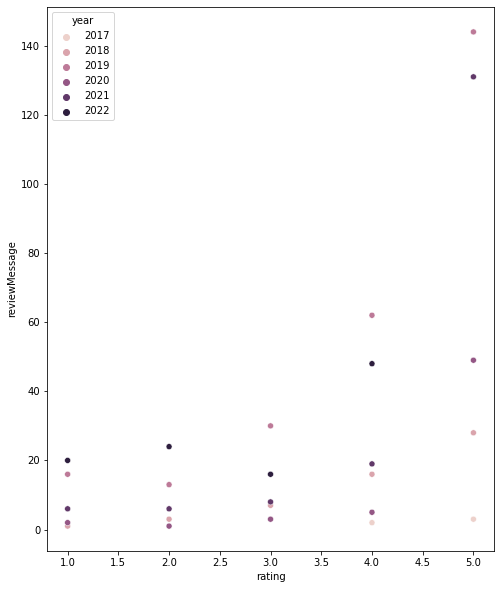

In [29]:
plt.figure(figsize=(8,10))
sns.scatterplot(x = 'rating', y = 'reviewMessage', hue = 'year', data = Tripadvisor_boston4);

In [30]:
Tripadvisor_boston5 = Tripadvisor_boston.sort_values(
     by=["Contribution", "Name"],
    ascending=False
   )[["Contribution", "Name"]]

Tripadvisor_boston5

,Contribution,Name
928,991,mariabarnes
913,99,lotsaplaces
991,99,Teresa C
116,98,PinkShoeAddict
938,97,KateRochell25
...,...,...
23,1,Amber C
990,1,Amanda N
90,1,Allyson K
950,1,795ianl


In [31]:
Tripadvisor_boston6 = Tripadvisor_boston5.head(20)
Tripadvisor_boston6

,Contribution,Name
928,991,mariabarnes
913,99,lotsaplaces
991,99,Teresa C
116,98,PinkShoeAddict
938,97,KateRochell25
423,97,Dawn S
801,96,Chava143
771,96,Audrey062
743,96,AjayCha
172,95,mul710


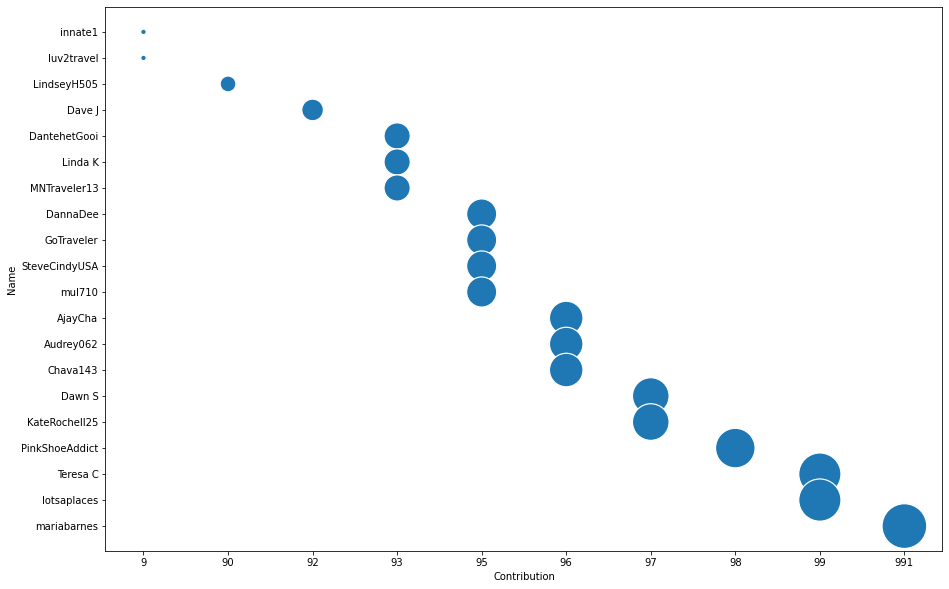

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=Tripadvisor_boston6.sort_values(
     by=["Contribution", "Name"],
    ascending=True
   )[["Contribution", "Name"]], x="Contribution", y="Name", size="Contribution", legend=False, sizes=(2000, 30))
plt.show()

In [34]:
with open("reviewMessage.txt", "w") as f_out:
    f_out.write(" ".join(Tripadvisor_boston["reviewMessage"].str.lower()))

In [35]:
#open text file in read mode
text_file = open("reviewMessage.txt", "r")
 
#read whole file to a string
text = text_file.read()
text

'fun &amp; comfortable great way to see boston boston local knowledge and fun experience old town trolly bus trip big city orientation would ride again! great value for money great idea great great way to see and learn about boston great way to see the city! fabulous fun and informative great drivers, great tour pretty good great way to see the city excellent superb day in boston! very expensive way to see the town great way to see the city not worth it not worth the cost and wouldn’t recommend fun day do it good way to see all areas great way to see boston too much $ for not enough value rude af the staff were warm and friendly. the staff were very knowledgeable about the history of boston. in the future i would like some wonderful never use their service again and would not recommend to any one. great overview of boston service dogs are not truly welcome.driver would not allow us on bus without disclosing medical condition over pa. great tour. beanie is a fabulous guide. great way to

In [36]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

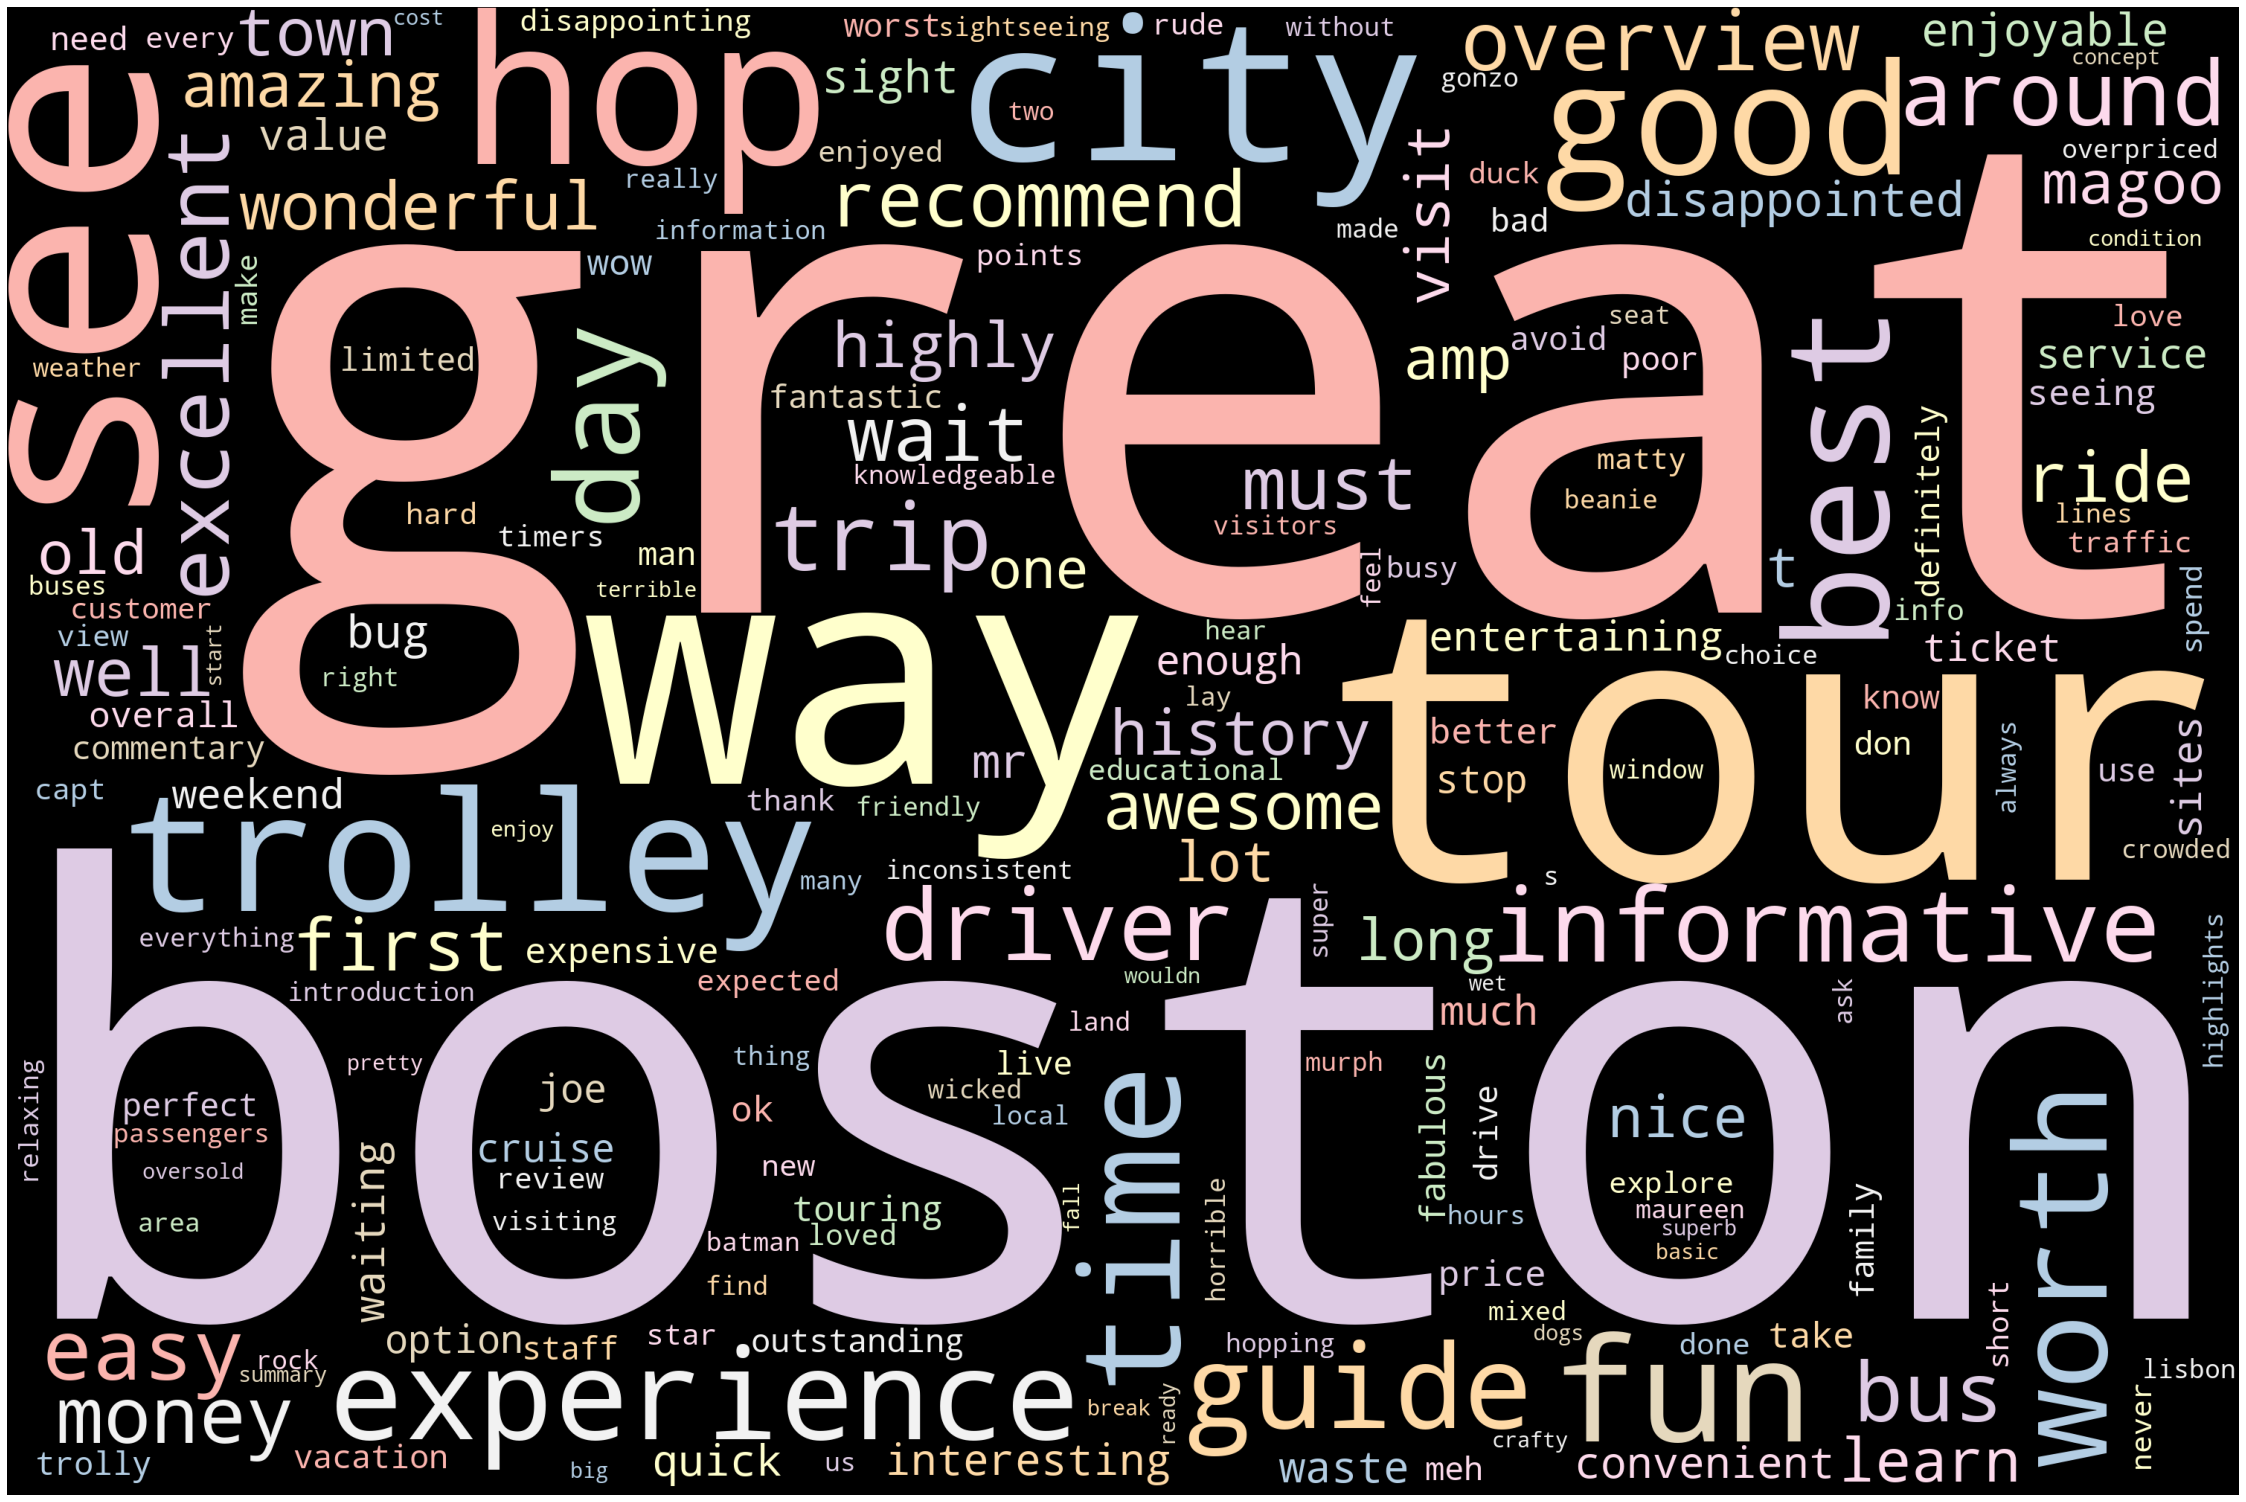

In [37]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [38]:
conn = sqlite3.connect('group.db')
cursor = conn.cursor()
query = 'SELECT * FROM Tripadvisorreviewstable'
DF = pd.read_sql(query, conn)
DF

,name,rating,contribution,userLocation,reviewMessage,month,year
0,JoeB70,5.0,86,"Lafayette, LA",Fun &amp; comfortable,Dec,2022
1,Cindy C,5.0,36,"Cedar Grove, NJ",Great way to see Boston,,
2,Barbara H,4.0,1,,Boston,Nov,2022
3,LouiseB,5.0,31,"Dublin, Ireland",Local knowledge and fun experience,Dec,2022
4,Ruth Rivard,5.0,2,,Old town trolly bus trip,,
...,...,...,...,...,...,...,...
1165,DonaldYokum,5.0,742,"Ventura, CA",Good coverage of Boston,Apr,2018
1166,Josie T,3.0,32,,Depends on driver,May,2018
1167,Brettkort1,5.0,617,"Appleton, WI",Great Tour of Boston!,Apr,2018
1168,xocy0135,5.0,10,"Atlanta, GA",Good Transportation and Fun,Nov,2017


In [39]:
DF = DF[DF.year != '']
DF = DF[DF.rating != '']
DF = DF[DF.reviewMessage != '']
#DF = DF[DF.contribution != '']
DF['year'] =DF['year'].astype(int)
DF['rating'] =DF['rating'].astype(float)
DF['reviewMessage'] =DF['reviewMessage'].astype(str)
#DF['contribution'] =DF['contribution'].astype(float)
DF['reviewMessage'].dtypes


dtype('O')

LinearRegression()
[-36.17669311]
Coefficient is =  [[0.02002897]]
R-Square is =  0.0006105655213286543
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5162
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.473
Time:                        20:41:05   Log-Likelihood:                -1321.6
No. Observations:                 847   AIC:                             2647.
Df Residuals:                     845   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

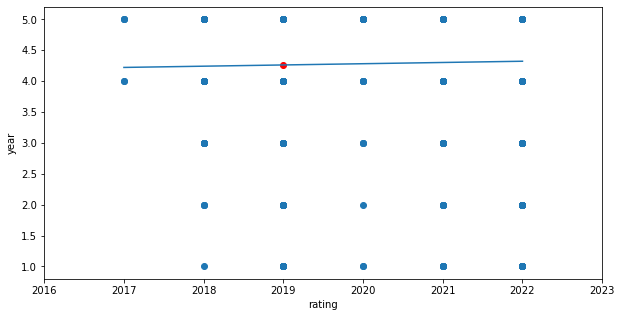

In [44]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
y=DF[['rating']].to_numpy()
x=DF[['year']].to_numpy()
plt.figure(figsize = (10,5))
model = LinearRegression()
print(model.fit(x, y))
print(model.intercept_)
print("Coefficient is = ", model.coef_)
print("R-Square is = ", model.score(x, y))


y_est = model.predict(x)
ax=plt.axes()
ax.set_xlabel('rating')
ax.set_ylabel('year')
plt.xlim(2016,2023)
ax.scatter(x, y)
ax.plot(x,y_est)
x=sm.add_constant(x)
model_ols=sm.OLS(y,x)
results=model_ols.fit()
print(results.summary())


x_new = np.asarray([2019])
y_pred=model.predict(x_new.reshape(1,-1)) 
print("Estimated ratings for the new data:", y_pred)
ax.scatter(x_new,y_pred,color='red')

In [45]:
#sentiment Analysis
def find_pol(review):
    return TextBlob(review).sentiment.polarity

DF['Sentiment_Polarity'] = DF['reviewMessage'].apply(find_pol)
DF.head()

,name,rating,contribution,userLocation,reviewMessage,month,year,Sentiment_Polarity
0,JoeB70,5.0,86,"Lafayette, LA",Fun &amp; comfortable,Dec,2022,0.35
2,Barbara H,4.0,1,,Boston,Nov,2022,0.00
3,LouiseB,5.0,31,"Dublin, Ireland",Local knowledge and fun experience,Dec,2022,0.15
6,Laura L,5.0,4,"Pensacola, FL",Would Ride again!,Aug,2022,0.00
7,Colin B,5.0,10,Blackpool,Great Value for money,Oct,2022,0.80


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

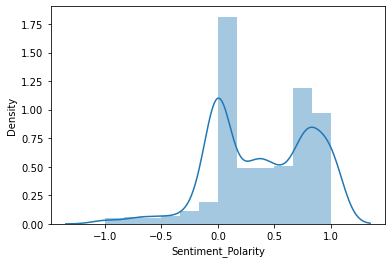

In [46]:
#polarity test
#the histogram show that the majority of review is positive that means they are good review 
sns.distplot(DF['Sentiment_Polarity'])

<AxesSubplot:xlabel='rating', ylabel='Sentiment_Polarity'>

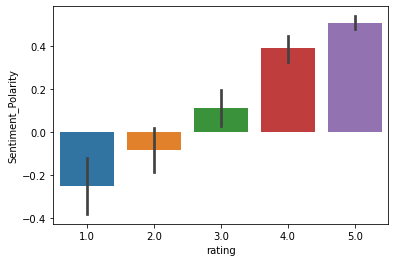

In [47]:
sns.barplot(x='rating', y='Sentiment_Polarity',data=DF)

In [48]:
most_negative = DF[DF.Sentiment_Polarity == -1].reviewMessage.head()
print(most_negative)

36                Terrible
111    Horrible experience
157             Awful!!!!!
319                  Awful
632              Disgusted
Name: reviewMessage, dtype: object


In [49]:
most_positive = DF[DF.Sentiment_Polarity == 1].reviewMessage.head()
print(most_positive)

11    Great way to see the city!
16                     Excellent
29                     Wonderful
44              Best of the best
52                Excellent Tour
Name: reviewMessage, dtype: object
